In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
%matplotlib inline
import mapclassify as mc
import geoplot as gplt
import geoplot.crs as gcrs

In [3]:
md = gpd.read_file("data/shp/BNDY_ZIPCodes5Digit_MDP.shp").astype({"ZIPCODE1": "str"}).to_crs("EPSG:4326")
md

,OBJECTID,ZIPCODE1,ZIPName,Shape_Leng,Shape_Area,geometry
0,1,00000,Assateague Island,270204.874736,5.614368e+07,"POLYGON ((-75.08950 38.32251, -75.08953 38.322..."
1,2,20601,Waldorf,102859.439905,1.817882e+08,"POLYGON ((-76.95719 38.69312, -76.95522 38.692..."
2,3,20602,Waldorf,41412.985581,6.317340e+07,"POLYGON ((-76.90475 38.61965, -76.90456 38.619..."
3,4,20603,Waldorf,44781.740801,6.871777e+07,"POLYGON ((-76.97839 38.65779, -76.97834 38.657..."
4,5,20606,Abell,20123.697918,5.421543e+06,"POLYGON ((-76.74698 38.24347, -76.74707 38.244..."
...,...,...,...,...,...,...
438,439,21915,Chesapeake City,85397.897261,1.167049e+08,"MULTIPOLYGON (((-75.77913 39.53248, -75.77803 ..."
439,440,21917,Colora,35283.355851,3.472952e+07,"POLYGON ((-76.07098 39.69192, -76.07045 39.686..."
440,441,21918,Conowingo,56412.387449,7.771447e+07,"POLYGON ((-76.15981 39.71799, -76.15888 39.716..."
441,442,21919,Earleville,158171.655357,2.102554e+08,"POLYGON ((-75.85623 39.45017, -75.85702 39.449..."


In [4]:
hospitals = gpd.read_file("data/shp/HLTH_Hospitals_DHMH.shp").astype({"Facility_Z": "str"}).to_crs("EPSG:4326")
hospitals

,OBJECTID,County,Facility_N,Facility_A,Facility_C,Facility_S,Facility_Z,Facility_P,Facility_1,License_Ca,License_In,CCN_,Type,geometry
0,65,ALLEGANY COUNTY,THOMAS B FINAN CENTER,"10102 COUNTRY CLUB ROAD, POST OFFICE BOX 1722",CUMBERLAND,MD,21502,(301) 777-2240,JOHN CULLEN,119.0,Licensed from: 07/24/2015 to 10/24/2018,214012,Psychiatric Hospital,POINT (-78.73607 39.65600)
1,66,ALLEGANY COUNTY,WESTERN MARYLAND REGIONAL MEDICAL CENTER,12500 WILLOWBROOK ROAD,CUMBERLAND,MD,21502,(240) 964-8001,BARRY RONAN,211.0,Licensed from: 05/20/2016 to 08/20/2019,210027,"Acute, General and Special Hospitals",POINT (-78.73123 39.65555)
2,67,ANNE ARUNDEL COUNTY,ANNE ARUNDEL MEDICAL CENTER,2001 MEDICAL PARKWAY,ANNAPOLIS,MD,21401,(443) 481-1307,VICTORIA BAYLESS,370.0,Licensed from: 11/23/2013 to 02/23/2017,210023,"Acute, General and Special Hospitals",POINT (-76.53416 38.99050)
3,68,ANNE ARUNDEL COUNTY,UNIVERSITY OF MD BALTO WASHINGTON MEDICAL CENTER,301 HOSPITAL DRIVE,GLEN BURNIE,MD,21061,(410) 595-1967,KAREN OLSCAMP,293.0,Licensed from: 05/07/2016 to 08/07/2019,210043,"Acute, General and Special Hospitals",POINT (-76.62292 39.13821)
4,69,BALTIMORE CITY,BON SECOURS HOSPITAL,2000 W BALTIMORE STREET,BALTIMORE,MD,21223,(410) 362-3000,SAMUEL ROSS,72.0,Licensed from: 05/07/2016 to 08/07/2019,210013,"Acute, General and Special Hospitals",POINT (-76.64888 39.28823)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,124,WASHINGTON COUNTY,WESTERN MARYLAND CENTER,1500 PENNSYLVANIA AVENUE,HAGERSTOWN,MD,21742,(301) 745-4140,MICHAEL REYKA,60.0,Licensed from: 01/22/2016 to 04/22/2019,212002,Geriatric Care Hospital,POINT (-77.71746 39.66561)
60,125,WICOMICO COUNTY,DEER'S HEAD CENTER,315 DEER'S HEAD HOSPITAL ROAD,SALISBURY,MD,21802,(410) 543-4000,MARY BETH WAIDE,NaN,Licensed from: 04/23/2015 to 07/23/2018,212003,Geriatric Care Hospital,POINT (-75.59586 38.38224)
61,126,WICOMICO COUNTY,HEALTHSOUTH CHESAPEAKE REHABILITATION HOSPITAL,220 TILGHMAN ROAD,SALISBURY,MD,21804,(410) 546-4600,STEVEN WALLIS,59.0,Licensed from: 03/07/2014 to 06/07/2017,213028,Rehabilitation Hospital,POINT (-75.54857 38.36930)
62,127,WICOMICO COUNTY,PENINSULA REGIONAL MEDICAL CENTER,100 EAST CARROLL AVENUE,SALISBURY,MD,21801,(410) 543-7111,PEGGY NAIPPA,281.0,Licensed from: 06/11/2016 to 09/11/2019,210019,"Acute, General and Special Hospitals",POINT (-75.59841 38.36203)


In [16]:
covid = pd.read_csv("data/COVID-19/MDCOVID19_MASTER_ZIP_CODE_CASES.csv", header=0).astype({"ZIP_CODE": "str"})

cols = [covid.columns[0]]

for date in covid.columns[1:]:
    date =date.replace("F", "").replace("total", "")
    d = date.split("_")
    
    cols.append("2020/0%s/%s" % (d[0].replace("0", ""), d[1]))

covid.columns = cols

covid

,ZIP_CODE,2020/04/11,2020/04/12,2020/04/13,2020/04/14,2020/04/15,2020/04/16,2020/04/17,2020/04/18,2020/04/19,...,2020/09/14,2020/09/15,2020/09/16,2020/09/17,2020/09/18,2020/09/19,2020/09/20,2020/09/21,2020/09/22,2020/09/23
0,20010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,21917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,14.0
512,21918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,34.0,34.0,34.0,34.0,35.0,36.0,37.0,37.0,37.0
513,21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,22.0,22.0,24.0,24.0,25.0,25.0,26.0,27.0,28.0
514,21921,37.0,38.0,40.0,41.0,42.0,45.0,47.0,47.0,48.0,...,371.0,382.0,386.0,393.0,395.0,404.0,409.0,414.0,419.0,424.0


In [18]:
md = md.merge(covid, left_on="ZIPCODE1", right_on="ZIP_CODE")
md

,OBJECTID,ZIPCODE1,ZIPName,Shape_Leng,Shape_Area,geometry,ZIP_CODE,2020/04/11,2020/04/12,2020/04/13,...,2020/09/14,2020/09/15,2020/09/16,2020/09/17,2020/09/18,2020/09/19,2020/09/20,2020/09/21,2020/09/22,2020/09/23
0,2,20601,Waldorf,102859.439905,1.817882e+08,"POLYGON ((-76.95719 38.69312, -76.95522 38.692...",20601,36.0,38.0,41.0,...,482.0,483.0,486.0,491.0,497.0,503.0,505.0,507.0,508.0,509.0
1,3,20602,Waldorf,41412.985581,6.317340e+07,"POLYGON ((-76.90475 38.61965, -76.90456 38.619...",20602,44.0,48.0,51.0,...,491.0,495.0,501.0,502.0,504.0,507.0,507.0,508.0,511.0,512.0
2,4,20603,Waldorf,44781.740801,6.871777e+07,"POLYGON ((-76.97839 38.65779, -76.97834 38.657...",20603,62.0,68.0,75.0,...,553.0,555.0,562.0,567.0,568.0,572.0,574.0,575.0,577.0,579.0
3,5,20606,Abell,20123.697918,5.421543e+06,"POLYGON ((-76.74698 38.24347, -76.74707 38.244...",20606,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,20607,Accokeek,60505.769059,8.908136e+07,"POLYGON ((-77.00809 38.69509, -77.00742 38.695...",20607,22.0,23.0,23.0,...,241.0,243.0,247.0,248.0,250.0,251.0,251.0,252.0,252.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,439,21915,Chesapeake City,85397.897261,1.167049e+08,"MULTIPOLYGON (((-75.77913 39.53248, -75.77803 ...",21915,NaN,NaN,NaN,...,19.0,19.0,19.0,21.0,21.0,22.0,23.0,23.0,23.0,23.0
438,440,21917,Colora,35283.355851,3.472952e+07,"POLYGON ((-76.07098 39.69192, -76.07045 39.686...",21917,NaN,NaN,NaN,...,12.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,14.0
439,441,21918,Conowingo,56412.387449,7.771447e+07,"POLYGON ((-76.15981 39.71799, -76.15888 39.716...",21918,NaN,NaN,NaN,...,31.0,34.0,34.0,34.0,34.0,35.0,36.0,37.0,37.0,37.0
440,442,21919,Earleville,158171.655357,2.102554e+08,"POLYGON ((-75.85623 39.45017, -75.85702 39.449...",21919,NaN,NaN,NaN,...,21.0,22.0,22.0,24.0,24.0,25.0,25.0,26.0,27.0,28.0


In [19]:
def min_distance(g1, g2):
    return g2.distance(g1).min()

md["dist_hosp"] = md.geometry.apply(min_distance, args=(hospitals,))

<ipython-input-19-18fb02cb3651>:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return g2.distance(g1).min()


In [21]:
md.to_file("data/shp/MD_zipcode_cases.shp")

### zipcode vis

In [31]:
df = gpd.read_file("data/shp/MD_zipcode_cases.shp").fillna(0)

In [32]:
dates = df.columns.to_list()[7:-2:14][:-1]
dates

['2020/04/12',
 '2020/04/26',
 '2020/05/10',
 '2020/05/24',
 '2020/06/07',
 '2020/06/21',
 '2020/07/05',
 '2020/07/19',
 '2020/08/02',
 '2020/08/16',
 '2020/08/30']

In [33]:
alldata = []
for date in dates:
    alldata += df[date].to_list()

alldatano0 = list(filter(lambda a: a!=0, alldata))

In [34]:
scheme = mc.UserDefined(alldata, [1] + list(mc.FisherJenks(alldatano0, k=9).bins))
scheme

UserDefined               

     Interval        Count
--------------------------
[   0.00,    1.00] |  1700
(   1.00,   81.00] |  1598
(  81.00,  202.00] |   571
( 202.00,  352.00] |   379
( 352.00,  523.00] |   230
( 523.00,  728.00] |   180
( 728.00,  997.00] |   110
( 997.00, 1361.00] |    61
(1361.00, 1928.00] |    23
(1928.00, 2798.00] |    10

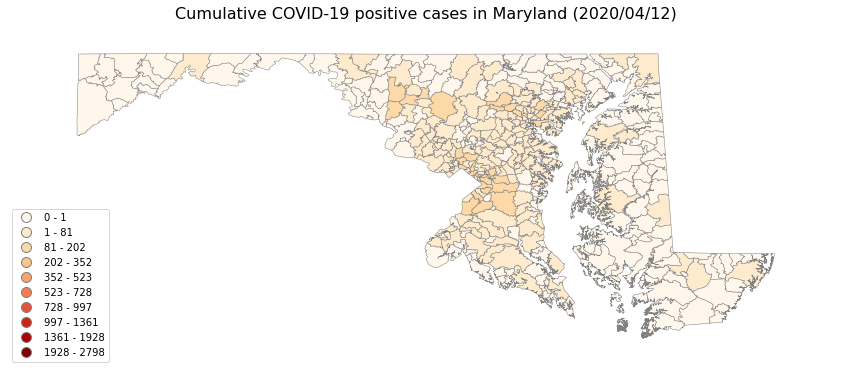

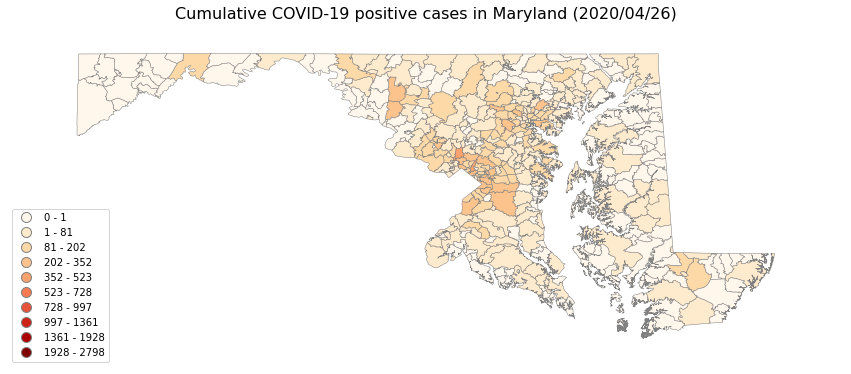

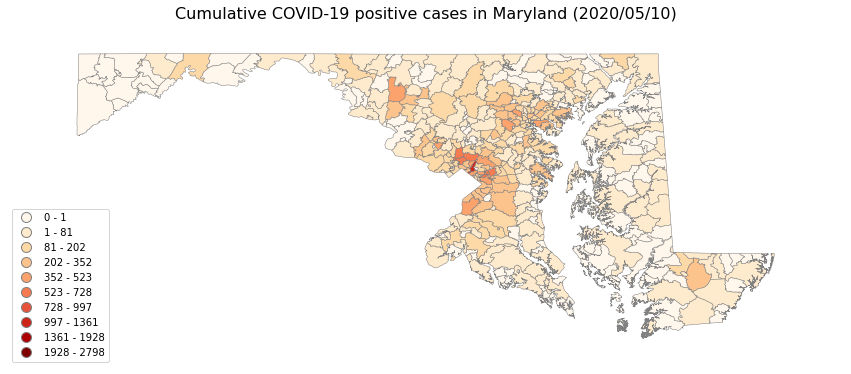

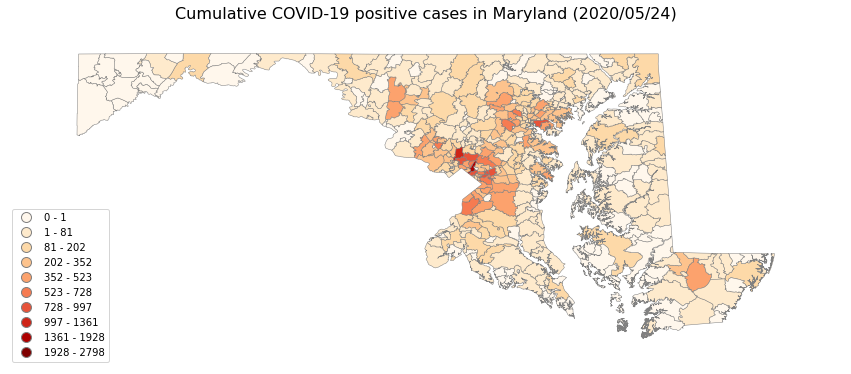

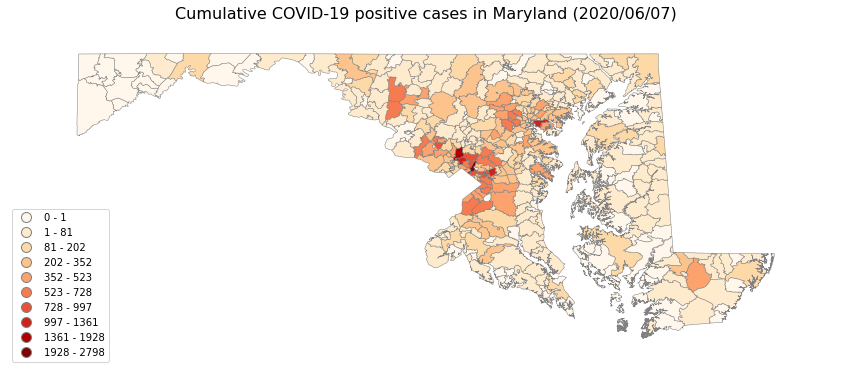

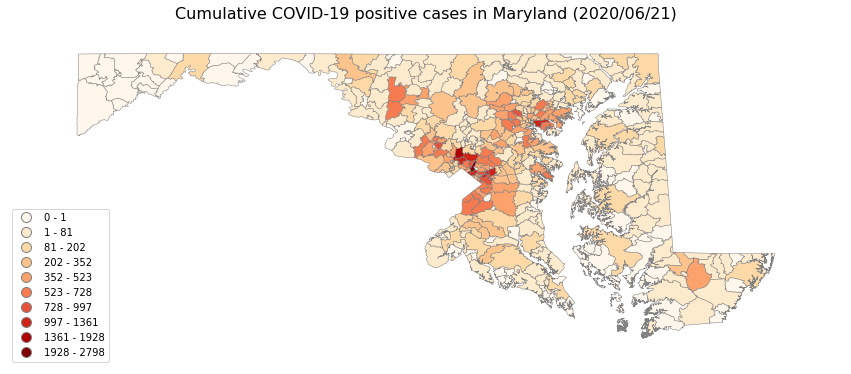

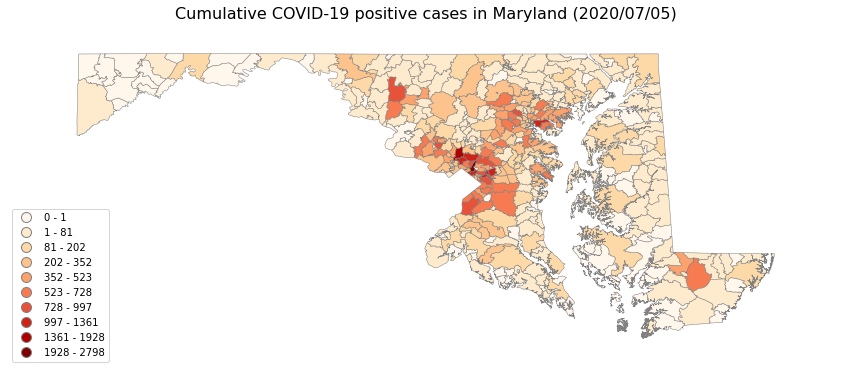

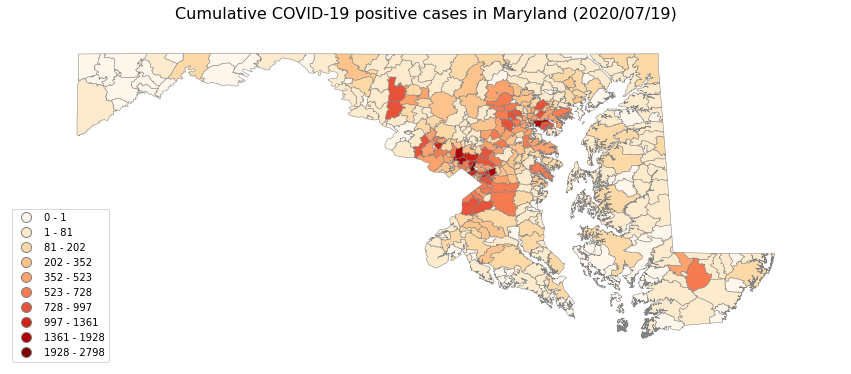

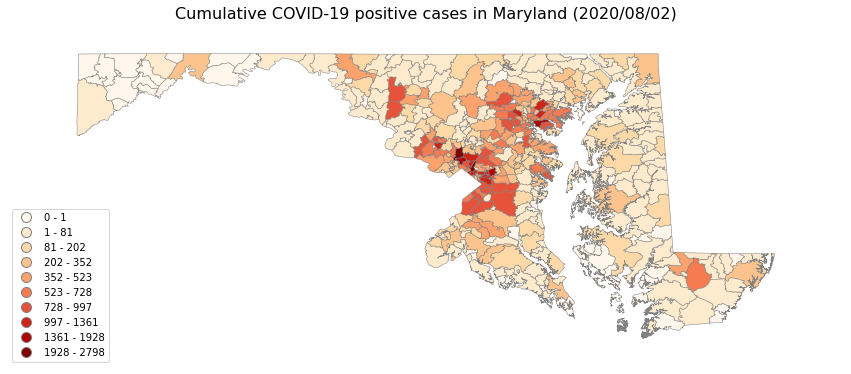

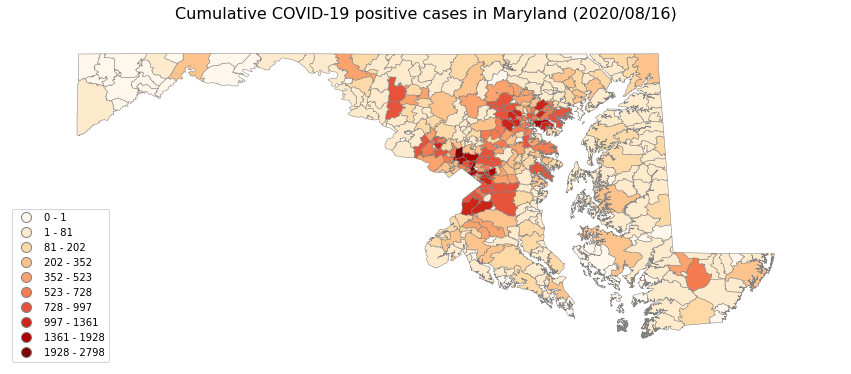

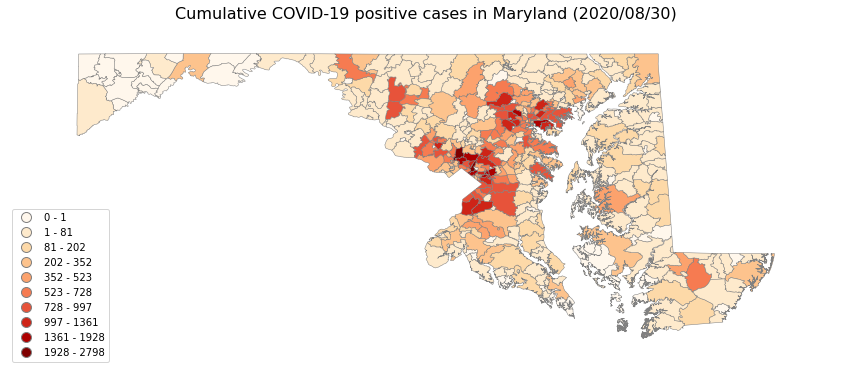

In [37]:
for date in dates:
    fig, ax = plt.subplots(figsize=(15, 10))
    
    gplt.choropleth(
        df,
        hue=date, scheme=scheme,
        cmap="OrRd", linewidth=0.5,
        edgecolor="grey",
        legend=True,
        legend_kwargs={"loc": "lower left"},
        ax=ax
    )

#     gplt.webmap(df, ax=ax)

    plt.title("Cumulative COVID-19 positive cases in Maryland (%s)" % date, fontsize=16)

    plt.show()
    
    fig.savefig("figs/zipcode_cases/%s.png" % date.replace("/", "-"), dpi=220)